In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
import os
from scipy.signal import savgol_filter, chirp, find_peaks, peak_widths
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%config InlineBackend.figure_format='retina'
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
sns.set_style("ticks")

now = datetime.now()
dt_string = now.strftime("%Y/%m/%d %H:%M:%S")
print("Last update =", dt_string)	

Last update = 2022/04/19 00:13:43


In [2]:
#path names-win
path_1 = r'/Users/tinghsi/Github/MPhil-thesis/Thesis-codes/Exp-1/data/train/ew3/train_dataset.csv'

#settings
kwargs = dict(header=0, index_col=0, parse_dates=False, squeeze=True)

#import csv files
df1 = pd.read_csv(path_1, **kwargs)

In [20]:
df1['Datetime'] = pd.to_datetime(df1.index, format = '%Y-%m-%d %H:%M')
df1['date'] = df1['Datetime'].dt.strftime('%d')

In [21]:
df1

,NH3_N,sin_hour,cos_hour,sin_day,cos_day,Datetime,date
Datetime,,,,,,,
2021-12-23 00:00:00,0.195660,0.000000,1.000000,-0.994522,0.104528,2021-12-23 00:00:00,23
2021-12-23 01:00:00,0.195968,0.258819,0.965926,-0.994522,0.104528,2021-12-23 01:00:00,23
2021-12-23 02:00:00,0.202905,0.500000,0.866025,-0.994522,0.104528,2021-12-23 02:00:00,23
2021-12-23 03:00:00,0.207961,0.707107,0.707107,-0.994522,0.104528,2021-12-23 03:00:00,23
2021-12-23 04:00:00,0.211359,0.866025,0.500000,-0.994522,0.104528,2021-12-23 04:00:00,23
...,...,...,...,...,...,...,...
2022-01-09 19:00:00,0.995677,-0.965926,0.258819,0.951057,-0.309017,2022-01-09 19:00:00,09
2022-01-09 20:00:00,0.885830,-0.866025,0.500000,0.951057,-0.309017,2022-01-09 20:00:00,09
2022-01-09 21:00:00,0.779980,-0.707107,0.707107,0.951057,-0.309017,2022-01-09 21:00:00,09


In [22]:
import plotly.express as px
fig = px.scatter_3d(df1, x='NH3_N', y='sin_hour', z='cos_hour',
              color='date')
fig.show()

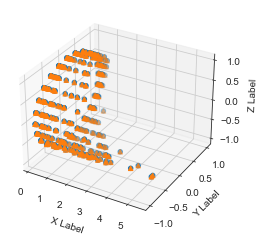

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
    xs = df1.iloc[:,0]
    ys = df1.iloc[:,1]
    zs = df1.iloc[:,2]
    ax.scatter(xs, ys, zs, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [6]:
import plotly.graph_objects as go
import numpy as np

# Helix equation

fig = go.Figure(data=[go.Scatter3d(x=df1.iloc[:,0], y=df1.iloc[:,1], z=df1.iloc[:,2],
                                   mode='markers')])
fig.show()

In [12]:
df1['Datetime'] = df1x.index

In [16]:
import plotly.express as px
fig = px.scatter_3d(df1, x='NH3_N', y='sin_hour', z='cos_hour',size_max=10,symbol='Datetime', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [11]:
df1

,NH3_N,sin_hour,cos_hour,sin_day,cos_day
Datetime,,,,,
2021-12-23 00:00:00,0.195660,0.000000,1.000000,-0.994522,0.104528
2021-12-23 01:00:00,0.195968,0.258819,0.965926,-0.994522,0.104528
2021-12-23 02:00:00,0.202905,0.500000,0.866025,-0.994522,0.104528
2021-12-23 03:00:00,0.207961,0.707107,0.707107,-0.994522,0.104528
2021-12-23 04:00:00,0.211359,0.866025,0.500000,-0.994522,0.104528
...,...,...,...,...,...
2022-01-09 19:00:00,0.995677,-0.965926,0.258819,0.951057,-0.309017
2022-01-09 20:00:00,0.885830,-0.866025,0.500000,0.951057,-0.309017
2022-01-09 21:00:00,0.779980,-0.707107,0.707107,0.951057,-0.309017


In [18]:
df1['day'] = df1['Datetime'].day()

AttributeError: 'Series' object has no attribute 'day'

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()